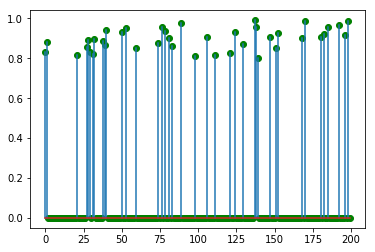

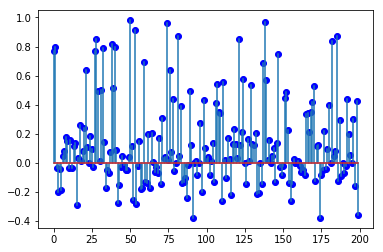

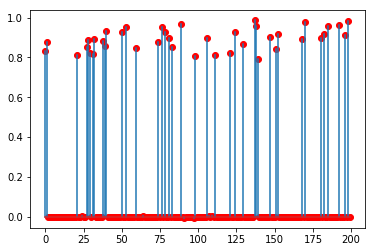

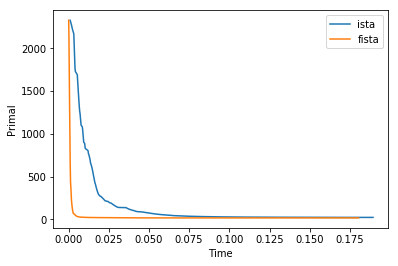

In [11]:
# Solve LASSO regression problem with ISTA, IHTA, FIHTA, and FISTA
# iterative solvers.


import time
from math import sqrt
import numpy as np
from scipy import linalg

rng = np.random.RandomState(42)
m, n = 150, 200

# random design
A = rng.randn(m, n)  # random design

x0 = rng.rand(n)
x0[x0 < 0.8] = 0
b = np.dot(A, x0)
l = 0.5  # regularization parameter


def soft_thresh(x, l):
    return np.sign(x) * np.maximum(np.abs(x) - l, 0.)\

def hard_thresh(x, l):
    for i in range(len(x)):
        if np.abs(x[i]) < l:
                x[i] = 0
    return x

def ista(A, b, l, maxit):
    x = np.zeros(A.shape[1])
    pobj = []
    L = linalg.norm(A) ** 2  # Lipschitz constant
    time0 = time.time()
    for _ in range(maxit):
        x = soft_thresh(x + np.dot(A.T, b - A.dot(x)) / L, l / L)
        this_pobj = 0.5 * linalg.norm(A.dot(x) - b) ** 2 + l * linalg.norm(x, 1)
        pobj.append((time.time() - time0, this_pobj))

    times, pobj = map(np.array, zip(*pobj))
    return x, pobj, times


def fista(A, b, l, maxit):
    x = np.zeros(A.shape[1])
    pobj = []
    t = 1
    z = x.copy()
    L = linalg.norm(A) ** 2
    time0 = time.time()
    for _ in range(maxit):
        xold = x.copy()
        z = z + A.T.dot(b - A.dot(z)) / L
        x = soft_thresh(z, l / L)
        t0 = t
        t = (1. + sqrt(1. + 4. * t ** 2)) / 2.
        z = x + ((t0 - 1.) / t) * (x - xold)
        this_pobj = 0.5 * linalg.norm(A.dot(x) - b) ** 2 + l * linalg.norm(x, 1)
        pobj.append((time.time() - time0, this_pobj))

    times, pobj = map(np.array, zip(*pobj))
    return x, pobj, times


maxit = 3000
x_ista, pobj_ista, times_ista = ista(A, b, l, maxit)

x_fista, pobj_fista, times_fista = fista(A, b, l, maxit)

import matplotlib.pyplot as plt
plt.close('all')

plt.figure()
plt.stem(x0, markerfmt='go')

plt.figure()
plt.stem(x_ista, markerfmt='bo')

plt.figure()
plt.stem(x_fista, markerfmt='ro')

plt.figure()
plt.plot(times_ista, pobj_ista, label='ista')
plt.plot(times_fista, pobj_fista, label='fista')
plt.xlabel('Time')
plt.ylabel('Primal')
plt.legend()
plt.show()